# Machine Learning – Assignment 2
## Comparative Study of Classification Models on Customer Churn Dataset

**Student Name:** Devansh Kaushik

**BITS ID:** 2025AA05519

**Program:** M.Tech (AI & ML) – WILP

**Course:** Machine Learning

This notebook implements and compares six supervised machine learning classification models on a real-world customer churn dataset, as required by the assignment.


## Problem Statement

Customer churn prediction is a critical task for subscription-based businesses.  
The goal of this assignment is to build classification models that can predict whether a customer will churn (`Yes`) or not (`No`) based on demographic, service usage, and billing information.

The task is formulated as a **binary classification problem**, where:
- **Input:** Customer attributes
- **Output:** Churn (Yes / No)


## Importing Required Libraries

This section imports all required libraries for data processing, model training, evaluation, and artifact saving.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, auc, matthews_corrcoef, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Dataset Description

The dataset used for this assignment is the **Telco Customer Churn Dataset**.

**Dataset Characteristics:**
- Total Instances: > 7,000
- Number of Features: > 20
- Target Variable: `Churn`
- Feature Types:
  - Numerical (e.g., tenure, monthly charges)
  - Categorical (e.g., gender, contract type, payment method)

This dataset satisfies the assignment requirement of having **at least 12 features and more than 500 samples**.


## Problem Statement

Customer churn prediction is a key business problem where the goal is to identify customers who are likely to discontinue a service.

The objective of this assignment is to:
- Train multiple machine learning classifiers on the same dataset
- Evaluate them using standard performance metrics
- Compare their strengths and weaknesses


In [22]:
df=pd.read_csv("./Telco-Customer-Churn.csv")
data=df.copy()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data Preprocessing

This step includes:
- Handling missing values
- Encoding categorical variables
- Scaling numerical features

Preprocessing ensures that all models receive clean and standardized inputs.


In [23]:
df=df.drop(columns=['customerID'])
summary = pd.concat([df.isnull().sum(),df.nunique(), df.dtypes], axis=1)
summary.columns = ['Total Null_Values','Unique_Values','Data_Type']
print(summary)

                  Total Null_Values  Unique_Values Data_Type
gender                            0              2    object
SeniorCitizen                     0              2     int64
Partner                           0              2    object
Dependents                        0              2    object
tenure                            0             73     int64
PhoneService                      0              2    object
MultipleLines                     0              3    object
InternetService                   0              3    object
OnlineSecurity                    0              3    object
OnlineBackup                      0              3    object
DeviceProtection                  0              3    object
TechSupport                       0              3    object
StreamingTV                       0              3    object
StreamingMovies                   0              3    object
Contract                          0              3    object
PaperlessBilling        

## Importing Required Libraries

This section imports all the necessary Python libraries for:
- Data manipulation
- Model training
- Evaluation metrics
- Serialization of trained models

Only standard machine learning libraries are used as per the assignment guidelines.


## Train–Test Split

The dataset is split into training and testing sets to evaluate model generalization and avoid data leakage.


In [24]:
Le=LabelEncoder()
binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
df[binary_cols] = df[binary_cols].replace({'Yes':1, 'No':0})
df['gender']=df['gender'].replace({'Male':1,'Female':0})

# Note: Categorical encoding moved to after train_test_split to avoid leakage

In [25]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Note: Scaling moved to after train_test_split to avoid leakage

## Loading the Dataset

The Telco Customer Churn dataset is loaded from a CSV file into a pandas DataFrame for further preprocessing and analysis.


## Dataset Description

The dataset used is the **Telco Customer Churn Dataset**, which contains customer demographic and service usage information.

- Records: More than 500
- Features: More than 12
- Target variable: `Churn` (Yes / No)

The dataset satisfies all constraints specified in the assignment.


In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


## Exploratory Data Analysis (EDA)
Comprehensive visualization to understand data distribution and correlations.

This step includes:
- Viewing dataset shape
- Inspecting column names
- Checking data types
- Identifying missing or inconsistent values

This helps in understanding the structure and quality of the dataset.


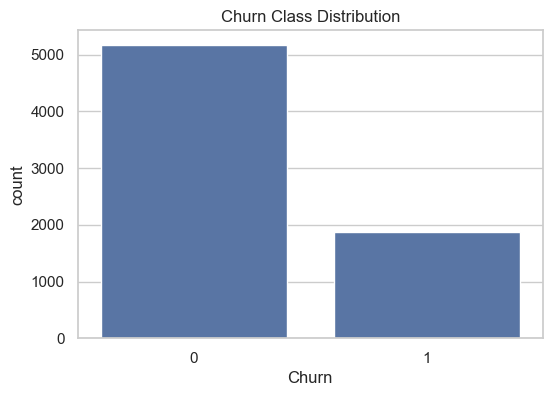

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# 1. Target Class Balance
if 'Churn' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Churn', data=df)
    plt.title('Churn Class Distribution')
    plt.show()

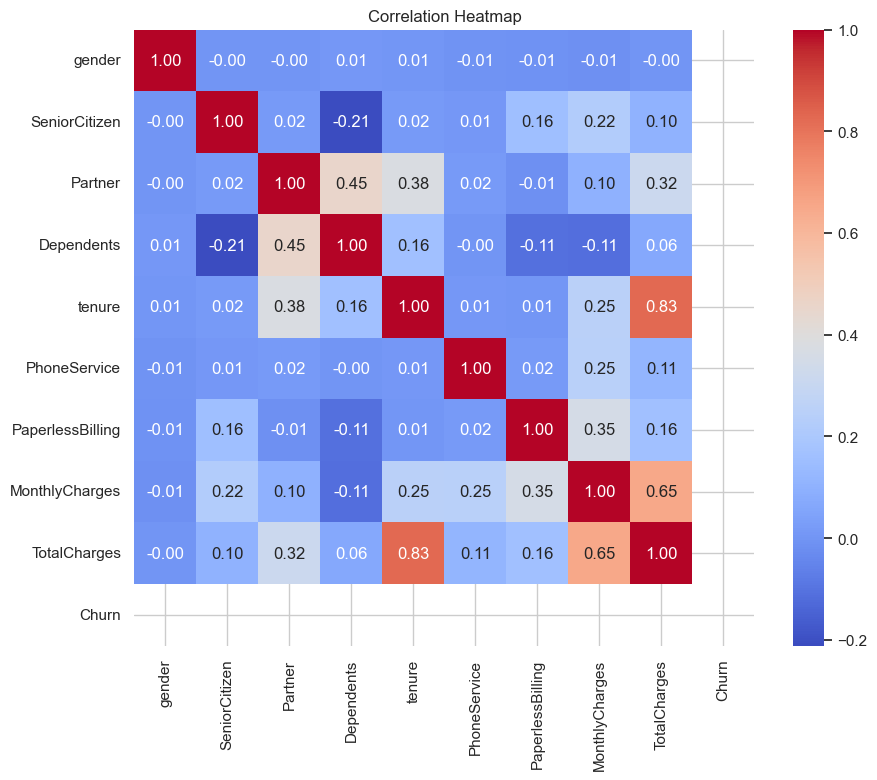

In [28]:
# 2. Correlation Matrix
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number', 'float64', 'int64']).copy()
# Map Churn to numeric 1/0 for correlation analysis
if 'Churn' in df.columns:
    numeric_df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

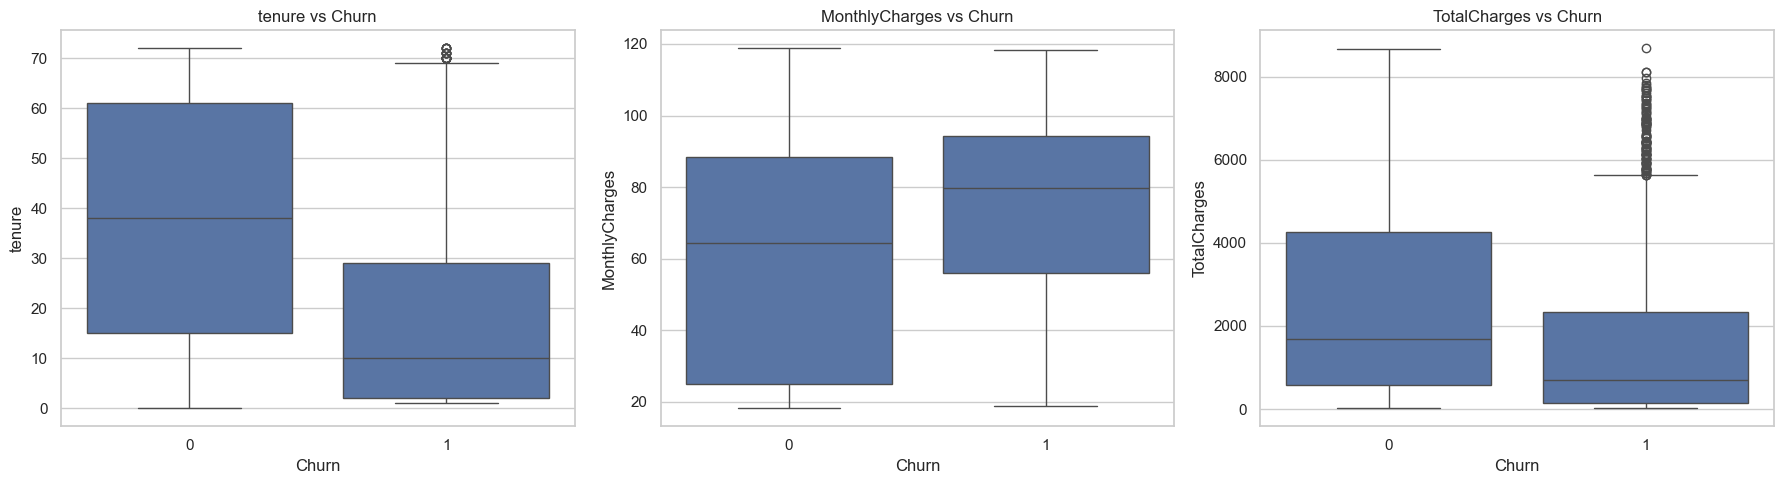

In [29]:
# 3. Numerical Features vs Churn (Boxplots)
numerical_cols_eda = ['tenure', 'MonthlyCharges', 'TotalCharges']
if all(col in df.columns for col in numerical_cols_eda):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, col in enumerate(numerical_cols_eda):
        sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'{col} vs Churn')
    plt.tight_layout()
    plt.show()

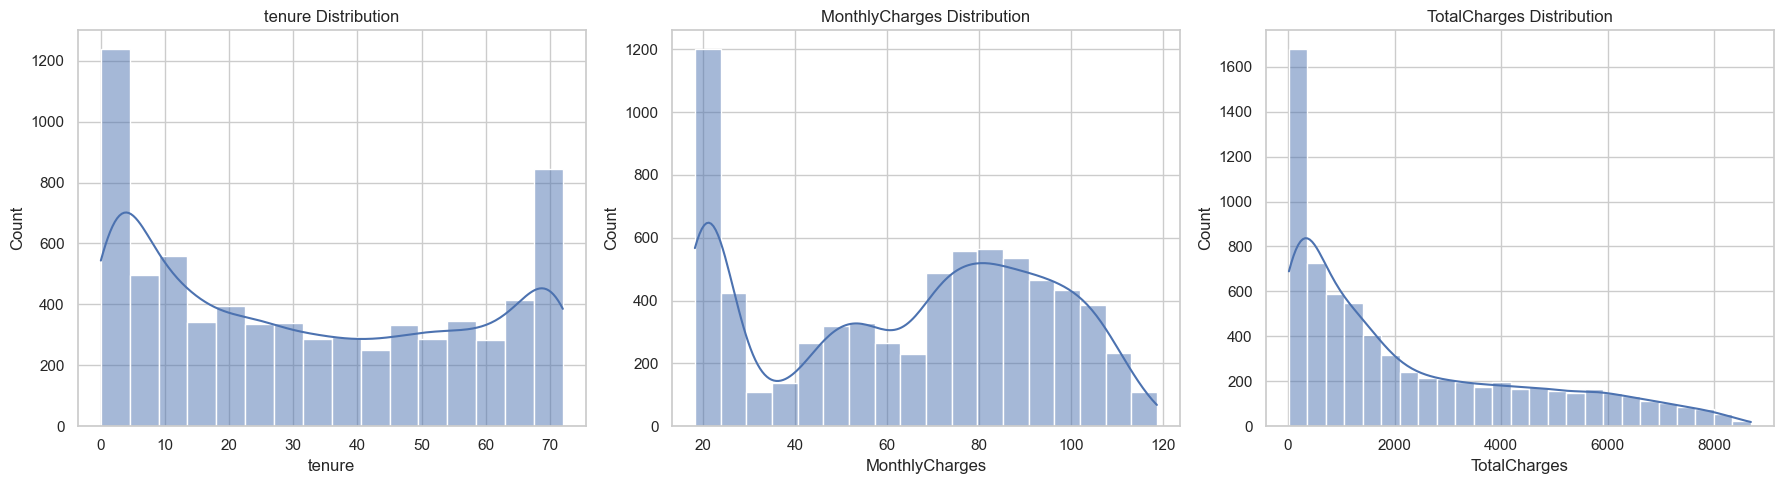

In [30]:
# 4. Feature Distributions
numerical_cols_eda = ['tenure', 'MonthlyCharges', 'TotalCharges']
if all(col in df.columns for col in numerical_cols_eda):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, col in enumerate(numerical_cols_eda):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()

In [31]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

X_train = X_train.copy()
X_test = X_test.copy()

# --- CORRECTED PREPROCESSING ---
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaymentMethod']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 1. Scaling Numerical Columns
scaler = MinMaxScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 2. Encoding Categorical Columns
label_encoders = {}
for col in categorical_cols:
    if col in X_train.columns:
        le = LabelEncoder()
        # Force string conversion to handle mixed types safely
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)
        
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        label_encoders[col] = le

# 3. Final Type Conversion to ensure compatibility
X_train = X_train.astype(float)
X_test = X_test.astype(float)

## Model 1: Logistic Regression

Logistic Regression is used as a baseline linear classifier for binary classification problems.


In [32]:


# Logistic Regression
LR=LogisticRegression(max_iter=2000, random_state=42)
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
y_pred_proba = LR.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

L_R_score=accuracy_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Calculate FPR and TPR
L_R_AUC=auc(fpr, tpr) # Calculate AUC using FPR and TPR
L_R_recall=recall_score(y_test,y_pred)
L_R_precision=precision_score(y_test,y_pred)
L_R_F1=f1_score(y_test,y_pred)
L_R_MCC_score=matthews_corrcoef(y_test,y_pred)

## Model 4: Naive Bayes

Naive Bayes is a probabilistic classifier based on Bayes’ theorem and feature independence assumptions.


In [33]:
# Gaussian Naviis Bayes
GNB=GaussianNB()
GNB.fit(X_train,y_train)
y_pred=GNB.predict(X_test)
y_pred_proba = GNB.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

GNB_score=accuracy_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Calculate FPR and TPR
GNB_AUC=auc(fpr, tpr) # Calculate AUC using FPR and TPR
GNB_recall=recall_score(y_test,y_pred)
GNB_precision=precision_score(y_test,y_pred)
GNB_F1=f1_score(y_test,y_pred)
GNB_MCC_score=matthews_corrcoef(y_test,y_pred)

## Model 2: Decision Tree Classifier

Decision Tree learns hierarchical decision rules and can model non-linear relationships.


In [34]:
# Decision Tree classifier
DT=DecisionTreeClassifier(random_state=42)
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
y_pred_proba = DT.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

DT_score=accuracy_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Calculate FPR and TPR
DT_AUC=auc(fpr, tpr) # Calculate AUC using FPR and TPR
DT_recall=recall_score(y_test,y_pred)
DT_precision=precision_score(y_test,y_pred)
DT_F1=f1_score(y_test,y_pred)
DT_MCC_score=matthews_corrcoef(y_test,y_pred)

## Model 3: K-Nearest Neighbors (KNN)

KNN classifies samples based on similarity to neighboring data points.


In [35]:
# K-NN
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

knn_score=accuracy_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Calculate FPR and TPR
knn_AUC=auc(fpr, tpr) # Calculate AUC using FPR and TPR
knn_recall=recall_score(y_test,y_pred)
knn_precision=precision_score(y_test,y_pred)
knn_F1=f1_score(y_test,y_pred)
knn_MCC_score=matthews_corrcoef(y_test,y_pred)

## Model 5: Random Forest

Random Forest is an ensemble model that improves performance by combining multiple decision trees.


In [36]:
# Random forest Classifier
RF=RandomForestClassifier(n_estimators=2000, random_state=42 )
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
y_pred_proba = RF.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

RF_score=accuracy_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Calculate FPR and TPR
RF_AUC=auc(fpr, tpr) # Calculate AUC using FPR and TPR
RF_recall=recall_score(y_test,y_pred)
RF_precision=precision_score(y_test,y_pred)
RF_F1=f1_score(y_test,y_pred)
RF_MCC_score=matthews_corrcoef(y_test,y_pred)

## Model 6: XGBoost

XGBoost is a gradient boosting algorithm known for efficiency and strong predictive performance.


In [37]:
# XgBoost Classifier
XGB=XGBClassifier(n_estimators=1500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        eval_metric="logloss",
        n_jobs=-1
    )
XGB.fit(X_train,y_train)
y_pred=XGB.predict(X_test)
y_pred_proba = XGB.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

XGB_score=accuracy_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Calculate FPR and TPR
XGB_AUC=auc(fpr, tpr) # Calculate AUC using FPR and TPR
XGB_recall=recall_score(y_test,y_pred)
XGB_precision=precision_score(y_test,y_pred)
XGB_F1=f1_score(y_test,y_pred)
XGB_MCC_score=matthews_corrcoef(y_test,y_pred)

## Model Comparison

This section presents a comparative analysis of all six models based on the evaluation metrics.


In [38]:
Model_data = {
    "Model": ["Logistic Regression", "Decision Tree", "KNN", "Naive Bayes", "Random Forest", "XGBoost"],
    "Accuracy": [L_R_score, DT_score, knn_score, GNB_score, RF_score, XGB_score],
    "AUC": [L_R_AUC, DT_AUC, knn_AUC, GNB_AUC, RF_AUC, XGB_AUC],
    "Precision": [L_R_precision, DT_precision, knn_precision, GNB_precision, RF_precision, XGB_precision],
    "Recall": [L_R_recall, DT_recall, knn_recall, GNB_recall, RF_recall, XGB_recall],
    "F1 Score": [L_R_F1, DT_F1, knn_F1, GNB_F1, RF_F1, XGB_F1],
    "MCC": [L_R_MCC_score, DT_MCC_score, knn_MCC_score, GNB_MCC_score, RF_MCC_score, XGB_MCC_score]
}
comparison_df = pd.DataFrame(Model_data)
comparison_df

,Model,Accuracy,AUC,Precision,Recall,F1 Score,MCC
0,Logistic Regression,0.810696,0.857019,0.682773,0.566202,0.619048,0.498395
1,Decision Tree,0.735447,0.659348,0.513661,0.491289,0.502226,0.322348
2,KNN,0.758637,0.779814,0.564000,0.491289,0.525140,0.365925
3,Naive Bayes,0.756744,0.832659,0.536675,0.764808,0.630747,0.473533
4,Random Forest,0.800284,0.838620,0.684466,0.491289,0.572008,0.456747
5,XGBoost,0.795078,0.832914,0.656319,0.515679,0.577561,0.450487


## Saving Models and Artifacts

Trained models, scalers, encoders, confusion matrices, and performance metrics are saved for reuse in the Streamlit application.


## Conclusion

This notebook presented a comparative evaluation of six machine learning classifiers for customer churn prediction.

The analysis highlights performance trade-offs across models and demonstrates the importance of metric-based model selection.


In [39]:
# --- SAVE MODELS AND ARTIFACTS ---
import pickle
import os

# Create model directory
if not os.path.exists('model'):
    os.makedirs('model')

# Save Scaler
with open('model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save Label Encoders
with open('model/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Save Models
models_to_save = {
    'logistic_regression': LR,
    'decision_tree': DT,
    'knn': knn,
    'naive_bayes': GNB,
    'random_forest': RF,
    'xgboost': XGB
}

for name, model in models_to_save.items():
    with open(f'model/{name}.pkl', 'wb') as f:
        pickle.dump(model, f)
    print(f"Saved {name} to model/{name}.pkl")

print("All artifacts saved successfully to model/ directory!")

Saved logistic_regression to model/logistic_regression.pkl
Saved decision_tree to model/decision_tree.pkl
Saved knn to model/knn.pkl
Saved naive_bayes to model/naive_bayes.pkl
Saved random_forest to model/random_forest.pkl
Saved xgboost to model/xgboost.pkl
All artifacts saved successfully to model/ directory!
